# Time Series Analysis of ASAS-SN

This time series analysis of ASAS-SN data was an attempt at measuring the rotation period of the G-type star HD 20794.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd
from astropy.timeseries import LombScargle

In [36]:
# Rotation Period (planet c) (estimate)
rp = 43.17

# Fonts and Sizes
figsize = (9, 5)
title_font = 18
label_font = 14
tick_font = 12

## ASAS-SN Dataset

We define a variable to contain the data from ASAS-SN. The file path would need to be adjusted based on where you have the file.

In [27]:
data = "/Users/andrewandmatthewfonseca/NWelch/HD20794/light_curve_a88b1310-e57d-4a47-8804-17d0aac72896.csv"
table = pd.read_table(data, comment='#', delim_whitespace=True)
colnames = ['HJD', 'mag']
print(table)

               HJD             UT_Date Camera  FWHM   Limit     mag  mag_err  \
0     2.456810e+06  2014-06-01.4466576     be  2.05  14.724  12.422    0.026   
1     2.456827e+06  2014-06-18.4204011     be  1.45  15.649  12.843    0.017   
2     2.456827e+06  2014-06-18.4219115     be  1.43  15.526  12.547    0.014   
3     2.456830e+06  2014-06-21.4175543     be  1.56  15.592  12.473    0.012   
4     2.456830e+06  2014-06-21.4191988     be  1.56  15.713  12.626    0.013   
...            ...                 ...    ...   ...     ...     ...      ...   
5451  2.460652e+06  2024-12-07.8767532     bo  1.43  14.744  12.617    0.031   
5452  2.460652e+06  2024-12-07.8779899     bo  1.43  14.667  12.599    0.033   
5453  2.460654e+06  2024-12-09.0269221     bk  1.60  15.623  13.921    0.046   
5454  2.460654e+06  2024-12-09.0281616     bk  1.57  15.828  13.942    0.039   
5455  2.460654e+06  2024-12-09.0293883     bk  1.56  15.728  13.963    0.043   

      flux(mJy)  flux_err Filter  
0   

## Scatter Plot

With this scatter plot, we can see the distribution of the data points.

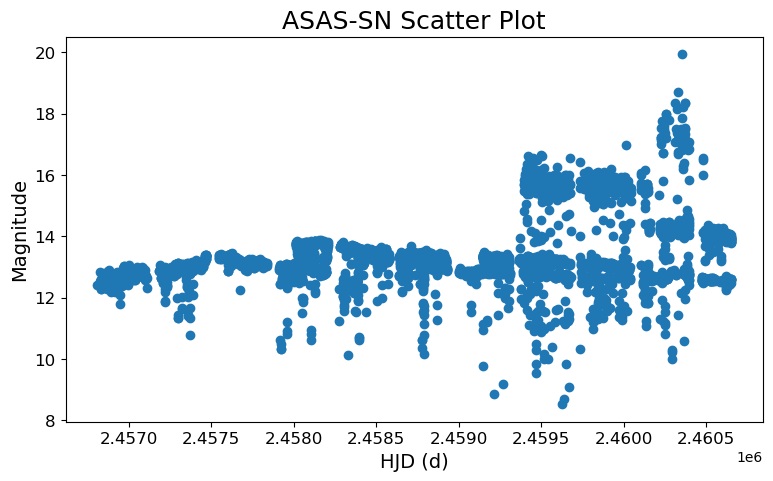

In [28]:
# Loading ASAS-SN data
hjd, mag = np.loadtxt(data, skiprows=1, unpack=True, usecols=[0, 5])
# Replaced all commas with whitespace, and removed all greater-than signs from data file.
# commented out lines with 99.990 so they are not included.
# Some lines with high magnitude and NaN values are commented out with a #? at the end to review them.

# Plotting
plt.figure(figsize=figsize)
plt.scatter(hjd, mag)
plt.title('ASAS-SN Scatter Plot', fontsize=title_font)
plt.xlabel('HJD (d)', fontsize=label_font)
plt.ylabel('Magnitude', fontsize=label_font)
plt.tick_params(axis='both', which='major', labelsize=tick_font)
plt.show()

## Histrogram

We take the data and create a histogram of the time steps. These time steps are in log base 10. 
- Problem with NaN values?

/var/folders/zd/pmykz9f551jbv4dx3xr_h_400000gn/T/ipykernel_71128/3042668576.py:6: RuntimeWarning: divide by zero encountered in log10
  plt.hist(np.log10(dt))


ValueError: supplied range of [-inf, 1.8776635611318153] is not finite

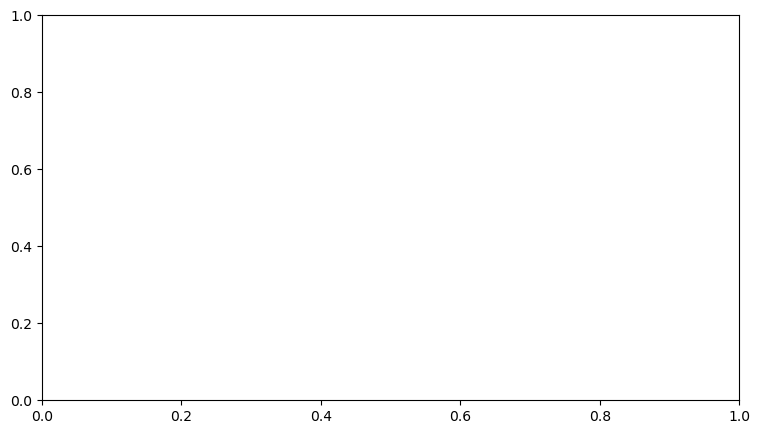

In [34]:
# Delta t 
dt = np.diff(hjd)

# Plotting
plt.figure(figsize=figsize)
plt.hist(np.log10(dt))
plt.title('Histrogram of Time Steps', fontsize=title_font)
plt.xlabel(r"$\log_{10}(\Delta t)$", fontsize=label_font)
plt.ylabel('# of Time Steps', fontsize=label_font)
plt.tick_params(axis='both', which='major', labelsize=tick_font)
plt.show()

## Periodogram

We create a periodogram from the LombScargle function using the data from Hipparcos.

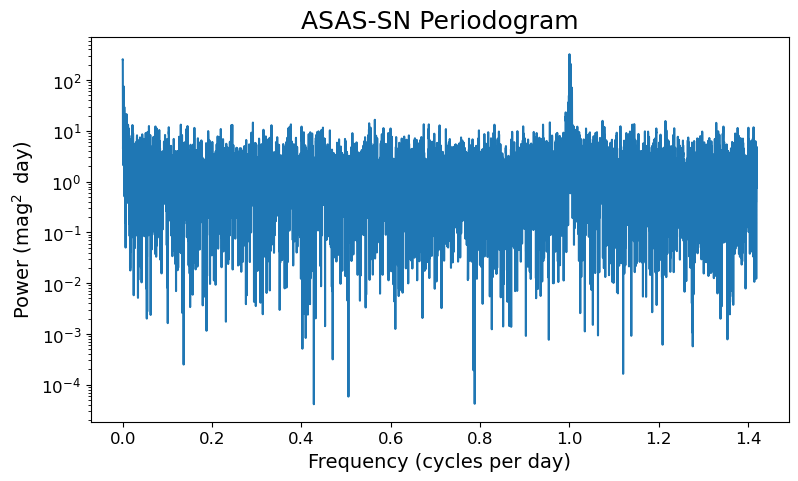

In [29]:
# Periodogram (Lower Frequencies)
freq, power = LombScargle(hjd, mag, normalization = 'psd').autopower(nyquist_factor=2)

# Plotting
plt.figure(figsize=figsize)
plt.semilogy(freq, power)
plt.title('ASAS-SN Periodogram', fontsize=title_font)
plt.xlabel(r"Frequency (cycles per day)", fontsize=label_font)
plt.ylabel(r"Power ($\operatorname{mag}^2$ day)", fontsize=label_font)
plt.tick_params(axis='both', which='major', labelsize=tick_font)
plt.show()

## Spectral Window

A spectral window is created below using the data found in the ASAS-SN dataset, using a nyquist factor of 2.

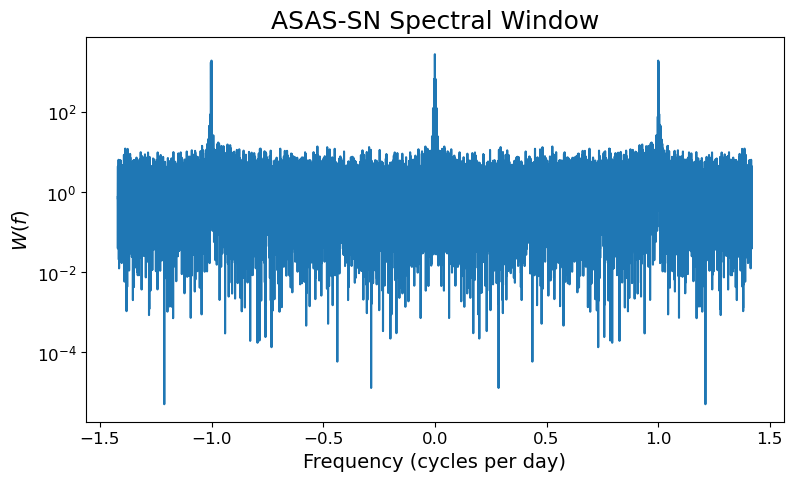

In [30]:
# Spectral Window
freq, specwin = LombScargle(hjd - hjd[0], np.ones(len(hjd)), center_data = False, fit_mean = False, normalization = 'psd').autopower(nyquist_factor=2)

# Plotting
plt.figure(figsize=figsize)
plt.semilogy(np.concatenate((-freq[::-1], freq[1:])), np.concatenate((specwin[::-1], specwin[1:])))
plt.title('ASAS-SN Spectral Window', fontsize=title_font)
plt.xlabel(r"Frequency (cycles per day)", fontsize=label_font)
plt.ylabel(r"$W(f)$", fontsize=label_font)
plt.tick_params(axis='both', which='major', labelsize=tick_font)
plt.show()

## Pseudo-Window

We create a pseudo-window from the data of the ASAS-SN dataset, using a nyquist factor of 2. 

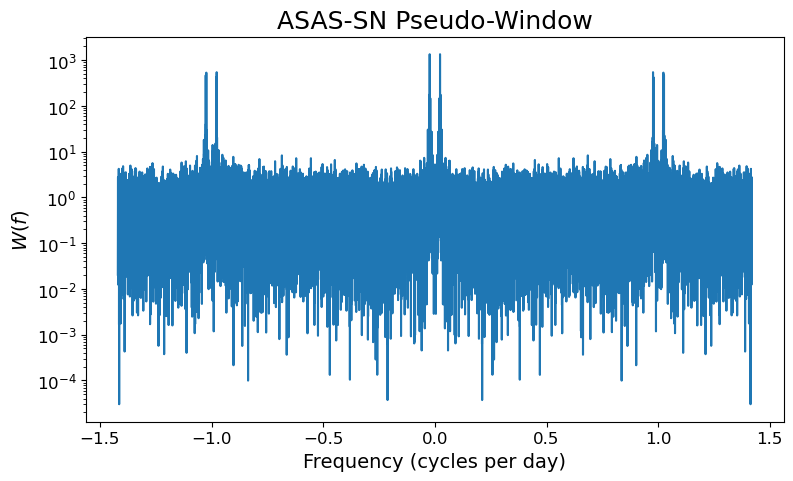

In [37]:
# Pseudo-Window
freq, specwin = LombScargle(hjd - hjd[0], np.sin(2*np.pi*(hjd-hjd[0])/rp), center_data = False, fit_mean = False, normalization = 'psd').autopower(nyquist_factor=2)

# Plotting
plt.figure(figsize=figsize)
plt.semilogy(np.concatenate((-freq[::-1], freq[1:])), np.concatenate((specwin[::-1], specwin[1:])))
plt.title('ASAS-SN Pseudo-Window', fontsize=title_font)
plt.xlabel(r"Frequency (cycles per day)", fontsize=label_font)
plt.ylabel(r"$W(f)$", fontsize=label_font)
plt.tick_params(axis='both', which='major', labelsize=tick_font)
plt.show()